# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [38]:
import numpy
import matplotlib.pyplot as plt

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

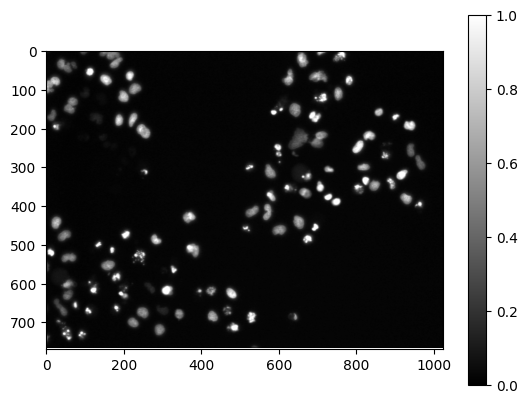

In [39]:
img = plt.imread("data/cells.png")
plt.figure()
plt.imshow(img, "gray")
plt.colorbar()

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([705771.,  23593.,  12589.,  10115.,   9097.,   7896.,   5675.,
          3669.,   2568.,   5459.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

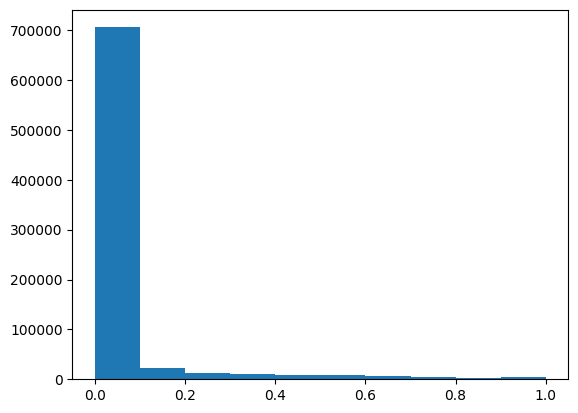

In [40]:
plt.hist(img.flatten())

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [41]:
T1 = 0.31
T2 = 0.59


### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

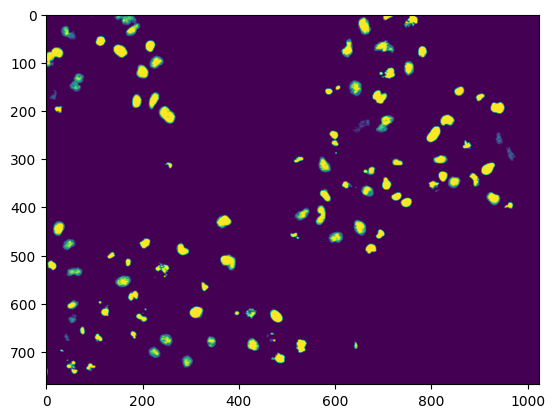

In [42]:
img_clip = img.clip(T1, T2)
plt.imshow(img_clip)

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

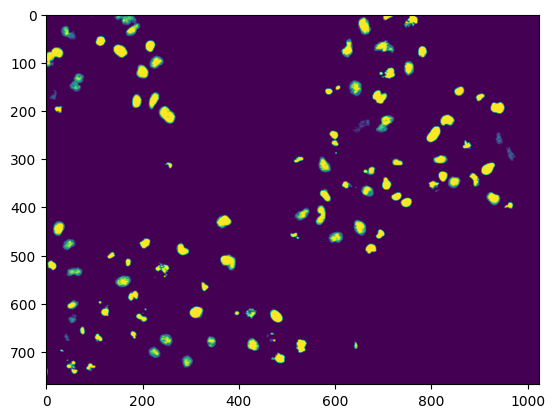

In [47]:
# using two nested for-loops and if-conditions
img.shape # (768, 1024)

img1 = img
x= 0
y= 0
for x in range (0,768):
    for y in range (0, 1024):
        if img1[x,y] < T1:
            img1[x,y] = T1
        if img1[x,y] > T2:
            img1[x,y] = T2
    y += 1
x += 1
          
plt.imshow(img1)


(array([746075.,   2783.,   2853.,   2371.,   2511.,   2498.,   2694.,
          2365.,   2182.,  20100.]),
 array([0.31      , 0.338     , 0.366     , 0.39399999, 0.42199999,
        0.44999999, 0.47799999, 0.50599998, 0.53399998, 0.56199998,
        0.58999997]),
 <BarContainer object of 10 artists>)

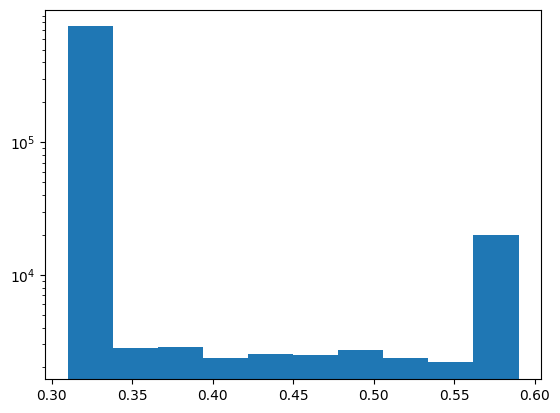

In [46]:
plt.hist(img1.flatten(), log=True)


**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

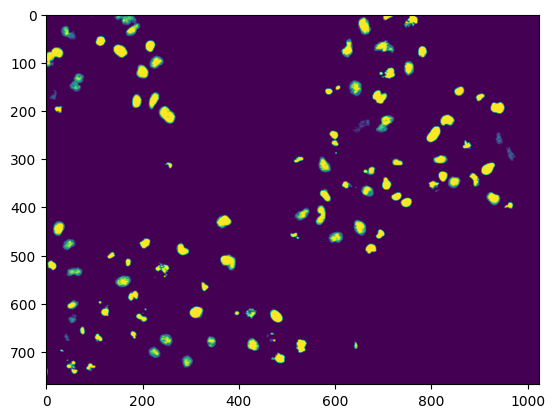

In [52]:
# using a single for-loop and if conditions
img2 = img

for n in numpy.ndindex(img2.shape):
    if img2[n] < T1:
        img2[n] = T1
    if img2[n] > T2:
        img2[n] = T2

plt.imshow(img2)



(array([746075.,   2783.,   2853.,   2371.,   2511.,   2498.,   2694.,
          2365.,   2182.,  20100.]),
 array([0.31      , 0.338     , 0.366     , 0.39399999, 0.42199999,
        0.44999999, 0.47799999, 0.50599998, 0.53399998, 0.56199998,
        0.58999997]),
 <BarContainer object of 10 artists>)

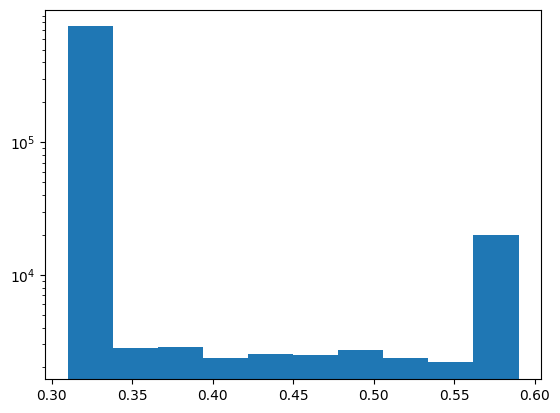

In [53]:
plt.hist(img2.flatten(), log=True)

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the `...` line with your code:

In [60]:
img3 = img 
def clip_image(img_in, T1, T2):
    img3 = img_in
    for n in numpy.ndindex(img2.shape):
        if img2[n] < T1:
            img2[n] = T1
        if img2[n] > T2:
            img2[n] = T2
    return img3

In [61]:

assert(clip_image(img_in, T1, T2) == img.clip(T1,T2)).all()

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img_in` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [ ]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

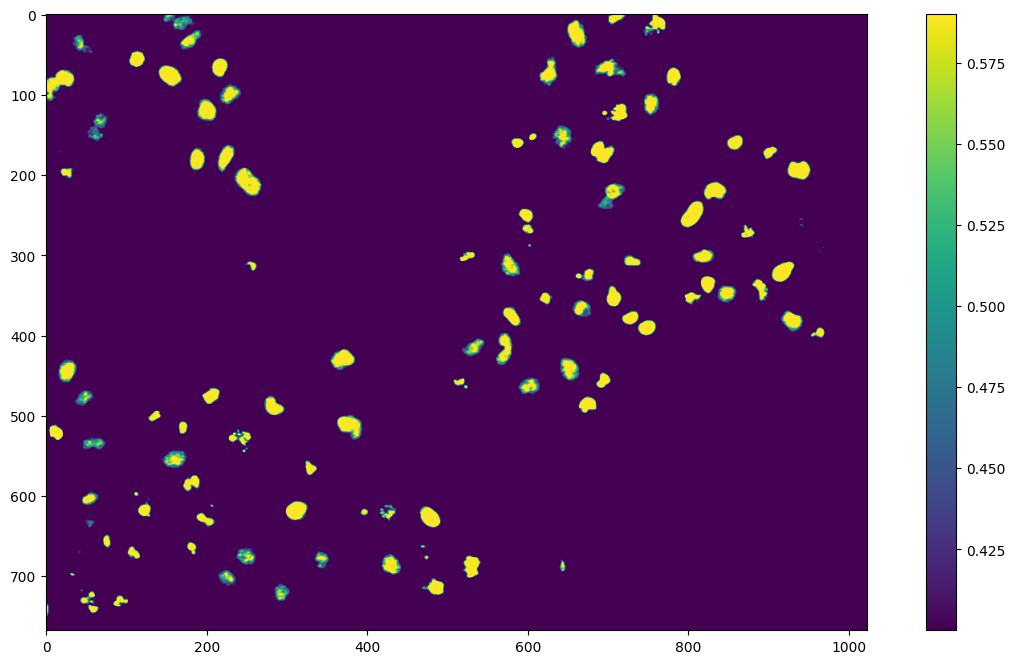

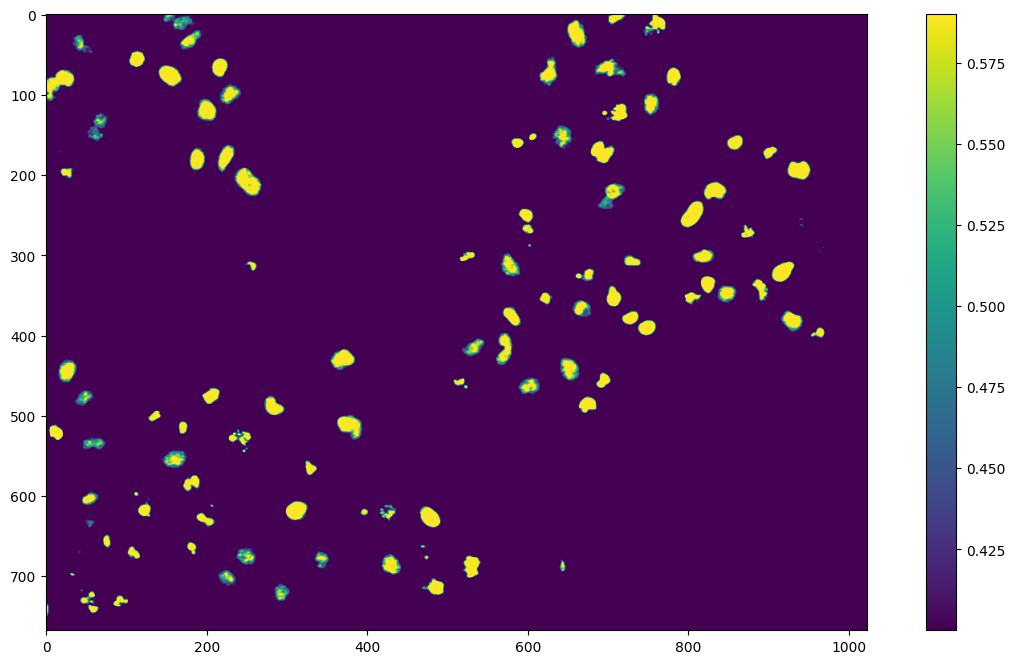

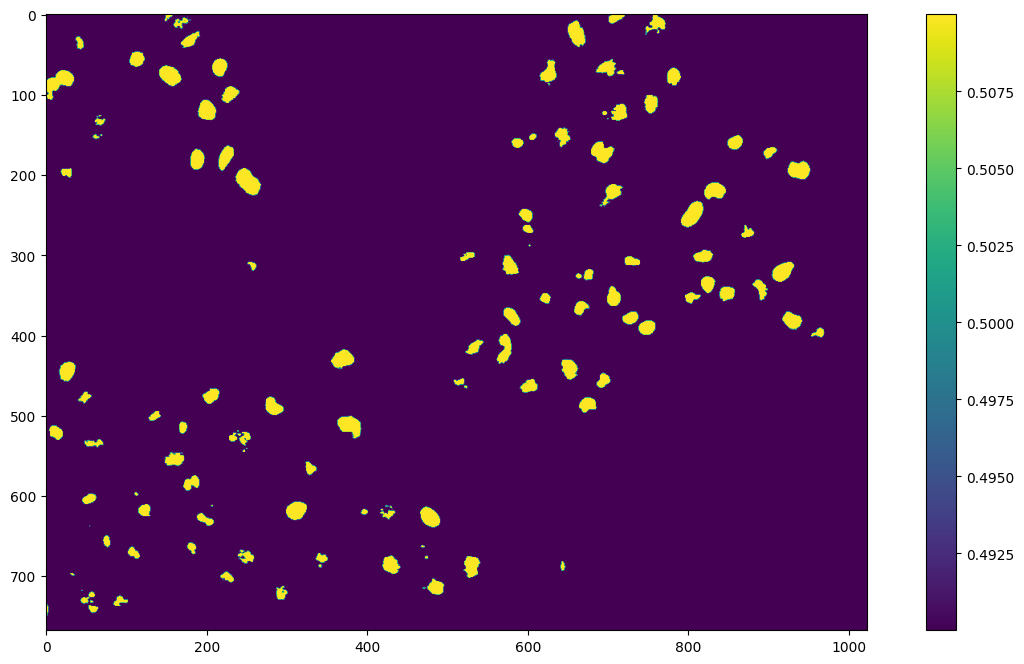

In [66]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8))
plt.colorbar()

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))
plt.colorbar()

# here goes your code
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.49, 0.51))
plt.colorbar()